In [130]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy.spatial import ConvexHull
import k3d
from mpl_toolkits import mplot3d


In [88]:

def read_binary_stl(filename):
    with open(filename, "rb") as f:
        # 80バイトのヘッダーをスキップ
        header = f.read(80)
        print("Header:", header.decode(errors="ignore"))

        # 4バイトの三角形数を取得
        num_triangles = struct.unpack("<I", f.read(4))[0]
        print("Number of triangles:", num_triangles)

        triangles = []

        for _ in range(num_triangles):
            # 1つの三角形のデータ（50バイト）
            data = f.read(50)

            # 法線ベクトル (3 x float32)
            normal = struct.unpack("<fff", data[0:12])

            # 3つの頂点座標 (3 x (3 x float32))
            v1 = struct.unpack("<fff", data[12:24])
            v2 = struct.unpack("<fff", data[24:36])
            v3 = struct.unpack("<fff", data[36:48])

            # 2バイトの属性バイト数（無視する）
            attr_byte_count = struct.unpack("<H", data[48:50])[0]

            triangles.append((normal, v1, v2, v3))

        return triangles

# 例：STLファイルを読み込んで表示
stl_file = "your_file.stl"
triangles = read_binary_stl(stl_file)

xs = np.array([])
ys = np.array([])
zs = np.array([])
if triangles:
    for t in triangles:
        print ("Triangle #", triangles.index(t))
        print("  Normal:", t[0])
        print("  Vertex 1:", t[1])
        print("  Vertex 2:", t[2])
        print("  Vertex 3:", t[3])
        # pdb.set_trace()
        xs = np.append(xs,t[0][0])
        xs = np.append(xs,t[0][1])
        xs = np.append(xs,t[0][2])
        ys = np.append(ys,t[1][0])
        ys = np.append(ys,t[1][1])
        ys = np.append(ys,t[1][2])
        zs = np.append(zs,t[2][0])
        zs = np.append(zs,t[2][1])
        zs = np.append(zs,t[2][2])



In [107]:
# 例：STLファイルを読み込んで表示
# stl_file = "your_file.stl"
stl_file = "box.stl"
triangles = read_binary_stl(stl_file)

zs = np.array([])
if triangles:
    for t in triangles:
        # print ("Triangle #", triangles.index(t))
        # print("  Normal:", t[0])
        # print("  Vertex 1:", t[1])
        # print("  Vertex 2:", t[2])
        # print("  Vertex 3:", t[3])
        # pdb.set_trace()
        # xs = np.append(xs,t[0][0])
        # xs = np.append(xs,t[0][1])
        # xs = np.append(xs,t[0][2])
        # ys = np.append(ys,t[1][0])
        # ys = np.append(ys,t[1][1])
        # ys = np.append(ys,t[1][2])
        zs = np.append(zs,t[2][0])
        zs = np.append(zs,t[2][1])
        zs = np.append(zs,t[2][2])


Header: STLB ATF 13.20.0.188 COLOR=                                                 
Number of triangles: 12


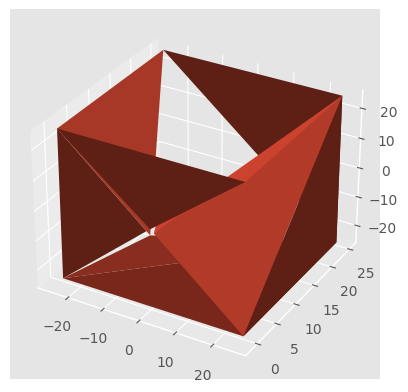

In [124]:
# Convert the list of triangles into a "flat" list of points
tri_points = list(chain.from_iterable(triangles))
# Get the X, Y and Z coordinates of each point
x, y, z = zip(*tri_points)
# Make list of triangle indices ([(0, 1, 2), (3, 4, 5), ...])
tri_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
# Make 3D axes
# ax = plt.figure().add_subplot(projection='3d')
ax = plt.axes(projection='3d')
# Plot triangles
ax.plot_trisurf(x, y, z, triangles=tri_idx)

In [115]:
z_points = np.linspace(zs.min(),zs.max(),3) 
xy_dict = {}
for zp in z_points:
    points = np.array([])
    for t in triangles:
        first = t[0]
        second = t[1]
        third = t[2]
        x1 = first[0]
        x2 = second[0]
        x3 = third[0]
        y1 = first[1]
        y2 = second[1]
        y3 = third[1]
        z1 = first[2]
        z2 = second[2]
        z3 = third[2]
        if zp > z1 and zp < z2:
            k = (zp-z1)/(z2-zp)
            x = 1/(1+k)*x1 + k/(1+k)*x2
            y = 1/(1+k)*y1 + k/(1+k)*y2
            # x = x1 + (x2 - x1) * (zp - z1) / (z2 - z1)
            # y = y1 + (y2 - y1) * (zp - z1) / (z2 - z1)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z2 and zp < z3:
            k = (zp-z2)/(z3-zp)
            x = 1/(1+k)*x2 + k/(1+k)*x3
            y = 1/(1+k)*y2 + k/(1+k)*y3
            # x = x2 + (x3 - x2) * (zp - z2) / (z3 - z2)
            # y = y2 + (y3 - y2) * (zp - z2) / (z3 - z2)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z3 and zp < z1:
            k = (zp-z3)/(z1-zp)
            x = 1/(1+k)*x3 + k/(1+k)*x1
            y = 1/(1+k)*y3 + k/(1+k)*y1
            # x = x3 + (x1 - x3) * (zp - z3) / (z1 - z3)
            # y = y3 + (y1 - y3) * (zp - z3) / (z1 - z3)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z2 and zp < z1:
            k = (zp-z2)/(z1-zp)
            x = 1/(1+k)*x2 + k/(1+k)*x1
            y = 1/(1+k)*y2 + k/(1+k)*y1
            # x = x2 + (x1 - x2) * (zp - z2) / (z1 - z2)
            # y = y2 + (y1 - y2) * (zp - z2) / (z1 - z2)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z3 and zp < z2:
            k = (zp-z3)/(z2-zp)
            x = 1/(1+k)*x3 + k/(1+k)*x2
            y = 1/(1+k)*y3 + k/(1+k)*y2
            # x = x3 + (x2 - x3) * (zp - z3) / (z2 - z3)
            # y = y3 + (y2 - y3) * (zp - z3) / (z2 - z3)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z1 and zp < z3:
            k = (zp-z1)/(z3-zp)
            x = 1/(1+k)*x1 + k/(1+k)*x3
            y = 1/(1+k)*y1 + k/(1+k)*y3
            # x = x1 + (x3 - x1) * (zp - z1) / (z3 - z1)
            # y = y1 + (y3 - y1) * (zp - z1) / (z3 - z1)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp == z1:
            x = x1
            y = y1
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp == z2:
            x = x2
            y = y2
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp == z3:
            x = x3
            y = y3
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
    xy_dict[zp] = points

xy_dict

{-25.0: array([[-25.,   0.],
        [-25.,  25.],
        [ 25.,   0.],
        [ 25.,  25.],
        [ 25.,   0.],
        [ 25.,   0.],
        [ 25.,  25.],
        [ 25.,  25.],
        [ 25.,   0.]]),
 0.0: array([[-25. ,   0. ],
        [-25. ,  12.5],
        [ 25. ,   0. ],
        [ 25. ,  12.5],
        [ 25. ,  25. ],
        [  0. ,  25. ],
        [ -0. ,  -1. ],
        [  0. ,   0. ]]),
 25.0: array([[-25.,   0.],
        [-25.,   0.],
        [ 25.,   0.],
        [ 25.,  25.],
        [-25.,   0.],
        [-25.,  25.],
        [ 25.,  25.],
        [-25.,  25.],
        [ 25.,   0.],
        [-25.,   0.]])}

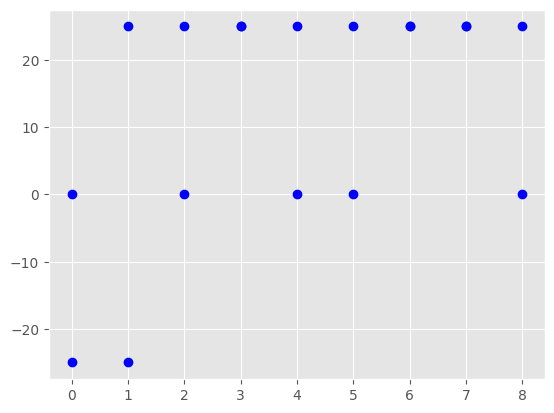

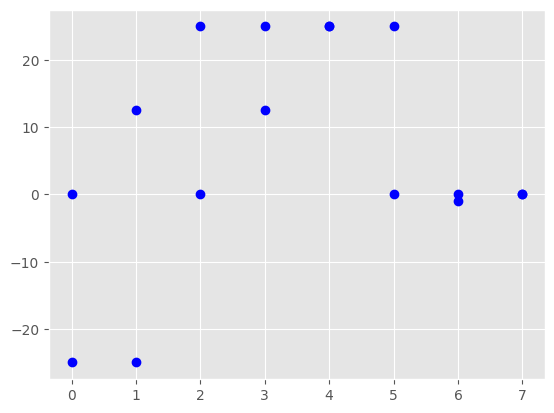

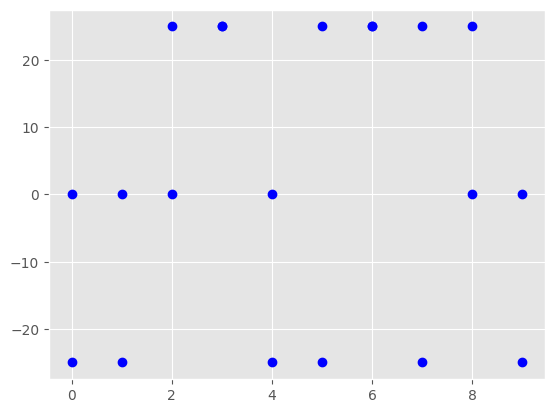

In [109]:
for zp in z_points:
    plt.figure()
    xy_points = xy_dict[zp]
    try:
        plt.plot(xy_points,'bo')
        # plt.scatter(points[:,0], points[:,1])
        # ax = plt.gca()
        # ax.set_aspect('equal', adjustable='box')
        # print(hull)
    except Exception:
        pass
plt.show()       

-25.0
0.0
25.0


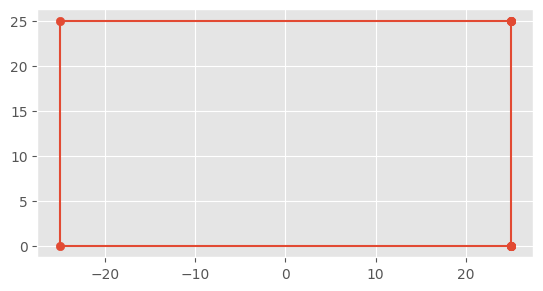

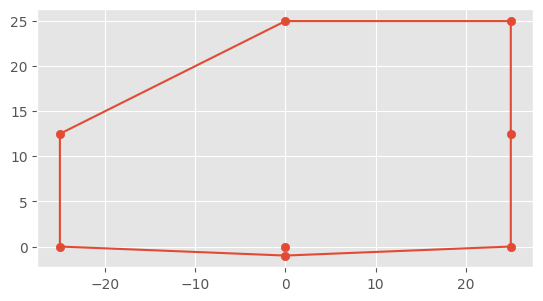

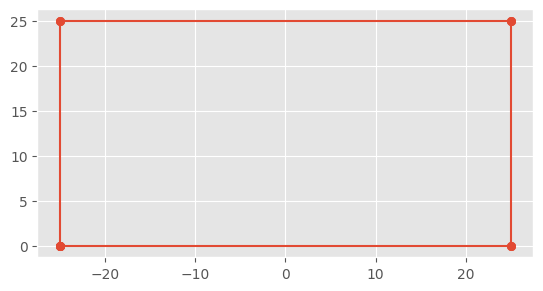

In [105]:
for zp in z_points:
    plt.figure()
    xy_points = xy_dict[zp]
    print(zp)
    try:
        hull = ConvexHull(xy_points)
        points = hull.points
        hull_points = points[hull.vertices]
        hp = np.vstack((hull_points, hull_points[0]))
        plt.plot(hp[:,0], hp[:,1])
        # plt.plot(xy_points,'bo')
        plt.scatter(points[:,0], points[:,1])
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        # print(hull)
    except Exception:
        pass
plt.show()       